# 03. Pyplot Visualization Example 3
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

### About this notebook

In this worksheet, we use a real dataset to illustrate the use of `matplotlib` in visualization.

---

### Reading the data

Reading the data from a .dat file and a ReadMe file with the tags using the command `ascii` from `astropy.io`.

The dataset is reported by Greene and Ho (2006) and contains the characteristics of 88 galaxies. 

Greene, J. E. and Ho, L. C. *The MBH − σ∗ Relation in Local Active Galaxies*. ApJ 641 L21 (2006)
https://ui.adsabs.harvard.edu/abs/2006ApJ...641L..21G/abstract

The dataset used by Greene and Ho is available online in various formats at

http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/ApJ/641/L21.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from astropy.io import ascii

In [2]:
data = ascii.read('table1.dat', readme='ReadMe')
data

Name,z,sigma*,e_sigma*,n_sigma*,FWHM,e_FWHM,logL,e_logL,logM,E_logM,e_logM
,,km / s,km / s,,km / s,km / s,[10-7W],[10-7W],[solMass],[solMass],[solMass]
str24,float64,float64,float64,str1,int64,int64,float64,float64,float64,float64,float64
SDSS J000805.62+145023.4,0.0454,140.0,27.0,--,7610,380,41.13,0.04,7.7,--,0.1
SDSS J004236.86-104921.8,0.0419,78.4,10.0,--,1960,97,41.58,0.14,6.7,--,0.1
SDSS J011703.58+000027.3,0.0456,98.8,16.0,--,2270,110,41.45,0.08,6.8,--,0.1
SDSS J020459.25-080816.0,0.0772,121.0,9.4,a,3720,180,41.13,0.05,7.0,--,0.1
SDSS J020615.99-001729.1,0.0426,216.0,30.0,--,3860,190,41.91,0.07,7.5,--,0.1
SDSS J021011.49-090335.5,0.0414,122.0,12.0,a,2450,120,41.24,0.07,6.7,--,0.1
SDSS J021257.59+140610.1,0.0618,174.0,12.0,a,3080,150,41.58,0.06,7.1,--,0.1
SDSS J033013.26-053236.0,0.0131,99.2,11.0,--,5160,250,40.45,0.06,7.0,--,0.1


The dataframe includes data from 88 supermassive black holes. The columns correspond to

**z** : Redshift \
**sigma**\* : Stellar velocity dispersion \
**e_sigma**\* : Formal uncertainty in sigma* \
**FWHM** : H<sub>$\alpha$</sub> Full-Width at Half Maximum \
**e_FWHM** : Formal uncertainty in FWHM \
**logL** : $\log_{10}$ of H<sub>$\alpha$</sub> luminosity in erg/s \
**e_logL** : Formal uncertainty in logL \
**logM** : $\log_{10}$ of the Black Hole mass \
**E_logM** : Formal (upper limit) uncertainty in logM \
**e_logM** : Formal (lower limit) uncertainty in logM 

---

Define the numpy arrays with the information from the dataset

In [3]:
z = np.array(data["z"])
sigma_star = np.array(data["sigma*"])
e_sigma_star = np.array(data["e_sigma*"])
logL = np.array(data["logL"])
e_logL = np.array(data["e_logL"])
logM = np.array(data["logM"])
e_logM = np.array(data["e_logM"])

### Plot the information

We show different combinations of the characteristics searching for some kind of patterns.

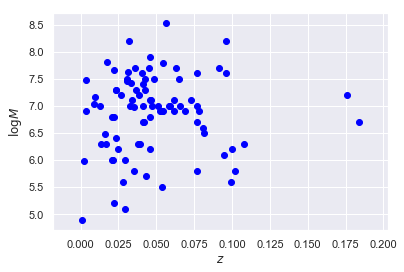

In [4]:
plt.scatter(z, logM,  color='blue')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')
plt.show()

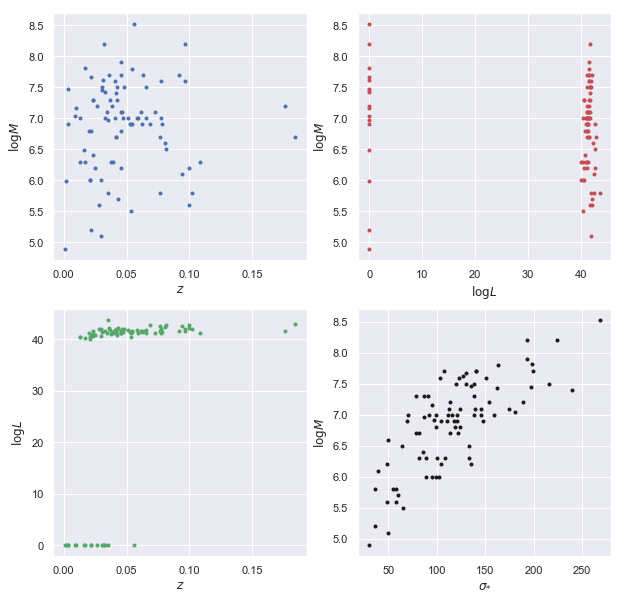

In [5]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.plot(z, logM, 'b.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log M$')

plt.subplot(222)
plt.plot(logL, logM, 'r.')
plt.xlabel(r'$\log L$')
plt.ylabel(r'$\log M$')

plt.subplot(223)
plt.plot(z, logL, 'g.')
plt.xlabel(r'$z$')
plt.ylabel(r'$\log L$')

plt.subplot(224)
plt.plot(sigma_star, logM, 'k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')

plt.show()

There are some interesting patterns such as:

- Two separate points (outcast) in the plot of $\log M$ vs $z$
- Two separate clusters in the plot of $\log M$ vs $\log L$
- Three separate clusters (or two clusters and two outcast points) in the plot of $\log L$ vs $z$
- An almost linear tendency in the plot of $\log M$ vs $\sigma_{*}$

However, the apparent clusters in figures 2 and 3 correspond to an abscence of data for some of the elements in the sample. In fact, looking at the values in $\log L$ we have

In [6]:
logL

array([41.13, 41.58, 41.45, 41.13, 41.91, 41.24, 41.58, 40.45, 41.63,
       41.67, 40.14, 40.42, 41.17, 41.31, 41.27, 40.72, 41.14, 40.8 ,
       41.46, 41.74, 41.51, 41.65, 41.17, 41.66, 40.1 , 41.57, 41.3 ,
       40.92, 41.62, 41.86, 40.58, 40.62, 41.81, 41.55, 41.62, 41.23,
       41.29, 41.1 , 41.84, 40.73, 40.46, 41.18, 42.09, 41.4 , 41.51,
       41.41, 41.86, 41.09, 40.99, 41.92, 41.24, 41.41, 41.83, 41.21,
       41.65, 41.87, 42.57, 41.93, 42.03, 40.47, 42.14, 42.68, 42.57,
       42.35, 42.75, 41.87, 42.67, 42.19, 41.22, 42.96, 43.61,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

showing many $0.$ values corresponding to abscence of data for some points in the original dataset. The zero values are incorporated by the `logL = np.array(data["logL"])` command above. In conclusion it is important to be aware of this kind of induced errors.

---
We will look deep into the behavior of $\log M$ vs $\sigma_{*}$

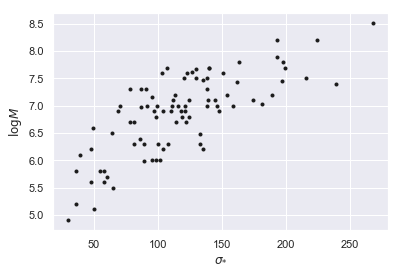

In [7]:
plt.plot(sigma_star, logM,  'k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

It looks lika a linear dependence, however we will introduce the error bars to obtain a better  perspective. We use the `errorbar` function from the `pyplot` package. See information in 


https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.errorbar.html

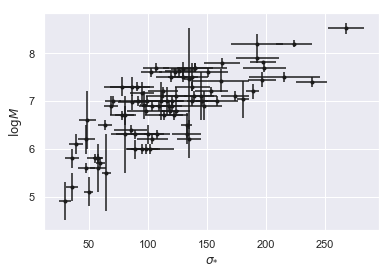

In [8]:
plt.errorbar(sigma_star, logM, e_logM, e_sigma_star, fmt='k.')
plt.xlabel(r'$\sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

The lower left corner indicates a nonlinear behavior. However, if we plot $\log M$ vs $\log \sigma_{*}$, the linear dependence is evident,

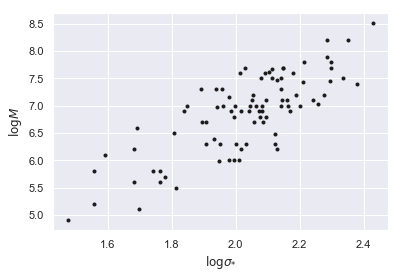

In [9]:
plt.plot(np.log10(sigma_star), logM,  'k.')
plt.xlabel(r'$\log \sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()

The linear tendency keeps when introducing the error bars.

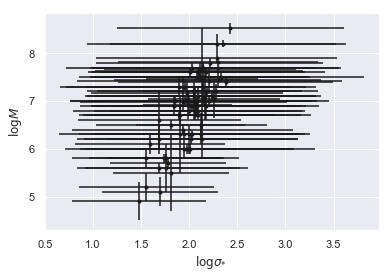

In [10]:
plt.errorbar(np.log10(sigma_star), logM, e_logM, np.log10(e_sigma_star), fmt='k.')
plt.xlabel(r'$\log \sigma_{*}$')
plt.ylabel(r'$\log M$')
plt.show()